In [1]:
## Import Library yang Diperlukan
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv('../data/Pegawai.csv', delimiter=';')

print(df.info())
print("\nJumlah missing value:")
print(df.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Name                200 non-null    object
 1   Sex                 200 non-null    object
 2   Marital Status      200 non-null    object
 3   Children            200 non-null    int64 
 4   Education           200 non-null    object
 5   Years Employed      200 non-null    int64 
 6   Work Hours          200 non-null    int64 
 7   Career Development  200 non-null    int64 
 8   Salary              200 non-null    int64 
 9   Bonuses             200 non-null    int64 
 10  Employee Intention  200 non-null    object
dtypes: int64(6), object(5)
memory usage: 17.3+ KB
None

Jumlah missing value:
Name                  0
Sex                   0
Marital Status        0
Children              0
Education             0
Years Employed        0
Work Hours            0
Career Development    0


In [4]:
# Encoding variabel kategorik
le = LabelEncoder()
kategorik_columns = ['Sex', 'Marital Status', 'Education', 'Career Development']

for col in kategorik_columns:
    df[col] = le.fit_transform(df[col])

# Encoding target variable
df['Employee Intention'] = le.fit_transform(df['Employee Intention'])


In [5]:
# Pisahkan fitur dan target
X = df.drop(['Employee Intention', 'Name'], axis=1)
y = df['Employee Intention']

# Split data training dan testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scaling fitur
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [6]:
## Bangun Model Neural Network
def create_model(input_dim):
    model = Sequential([
        Dense(64, activation='relu', input_shape=(input_dim,)),
        Dropout(0.3),
        Dense(32, activation='relu'),
        Dropout(0.2),
        Dense(16, activation='relu'),
        Dense(1, activation='sigmoid')
    ])
    
    model.compile(optimizer=Adam(learning_rate=0.001), 
                  loss='binary_crossentropy', 
                  metrics=['accuracy'])
    return model

In [7]:
# Inisiasi dan training model
model = create_model(X_train_scaled.shape[1])

# Early stopping untuk mencegah overfitting
early_stopping = tf.keras.callbacks.EarlyStopping(
    monitor='val_loss', 
    patience=10, 
    restore_best_weights=True
)

# Training model
history = model.fit(
    X_train_scaled, y_train, 
    validation_split=0.2, 
    epochs=100, 
    batch_size=32, 
    callbacks=[early_stopping],
    verbose=0
)

c:\Users\hp\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [8]:
# Prediksi pada data test
y_pred = (model.predict(X_test_scaled) > 0.5).astype(int)

# Cetak metrik evaluasi
print("\nHasil Evaluasi Model:")
print("Akurasi:", accuracy_score(y_test, y_pred))
print("\nLaporan Klasifikasi:")
print(classification_report(y_test, y_pred))

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step

Hasil Evaluasi Model:
Akurasi: 0.95

Laporan Klasifikasi:
              precision    recall  f1-score   support

           0       0.80      0.80      0.80         5
           1       0.97      0.97      0.97        35

    accuracy                           0.95        40
   macro avg       0.89      0.89      0.89        40
weighted avg       0.95      0.95      0.95        40



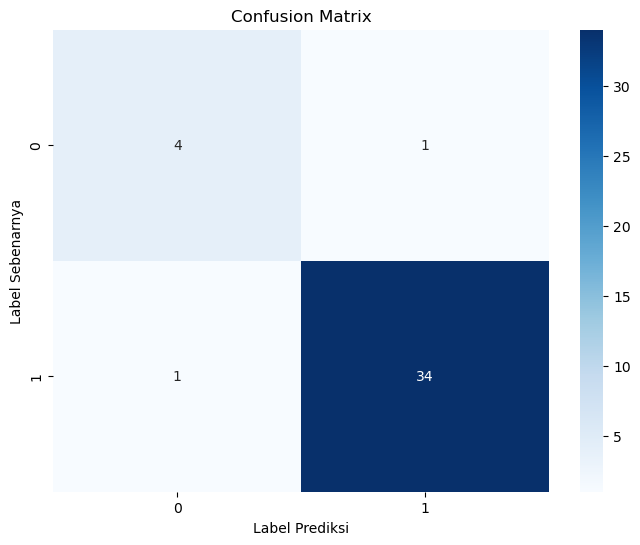

In [9]:
# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.ylabel('Label Sebenarnya')
plt.xlabel('Label Prediksi')
plt.show()

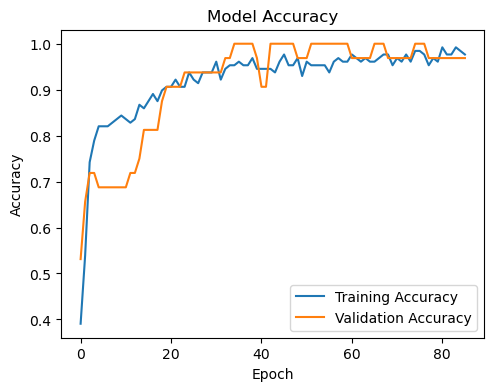

In [10]:
## Visualisasi Training History
plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

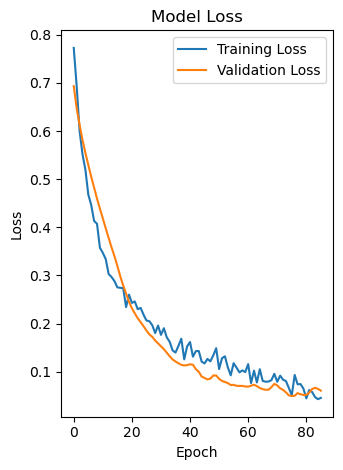

In [11]:
plt.subplot(1,2,2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.tight_layout()
plt.show()

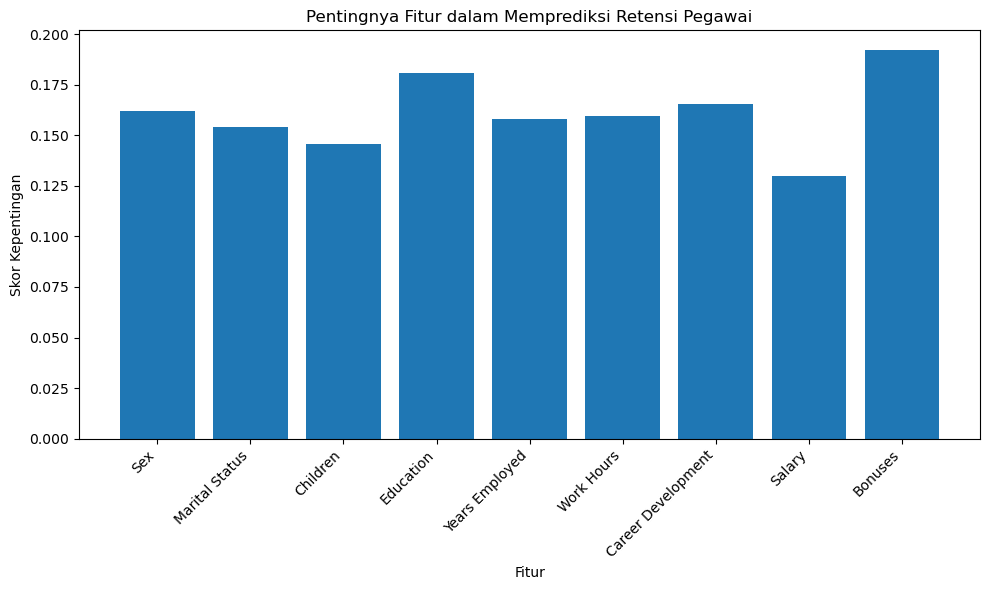

In [12]:
# Dapatkan bobot layer pertama untuk melihat pentingnya fitur
feature_importance = np.abs(model.layers[0].get_weights()[0]).mean(axis=1)
feature_names = X.columns

plt.figure(figsize=(10,6))
plt.bar(feature_names, feature_importance)
plt.title('Pentingnya Fitur dalam Memprediksi Retensi Pegawai')
plt.xlabel('Fitur')
plt.ylabel('Skor Kepentingan')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step 

10 Contoh Prediksi Terperinci:
    Actual_Intention  Predicted_Intention  Prediction_Probability  Prediction_Correct  Sex  Marital Status  Children  Education  Years Employed  Work Hours  Salary
39                 1                    0                0.225187               False    0               2         1          0              10          58    3362
3                  0                    1                0.909948               False    1               0         2          0               3          43    3289
22                 1                    1                0.999059                True    1               0         2          1               4          55    6786
23                 1                    1                0.998814                True    1               0         1          2               9          52    3987
24                 0                    0                0.078295                True    1               1    

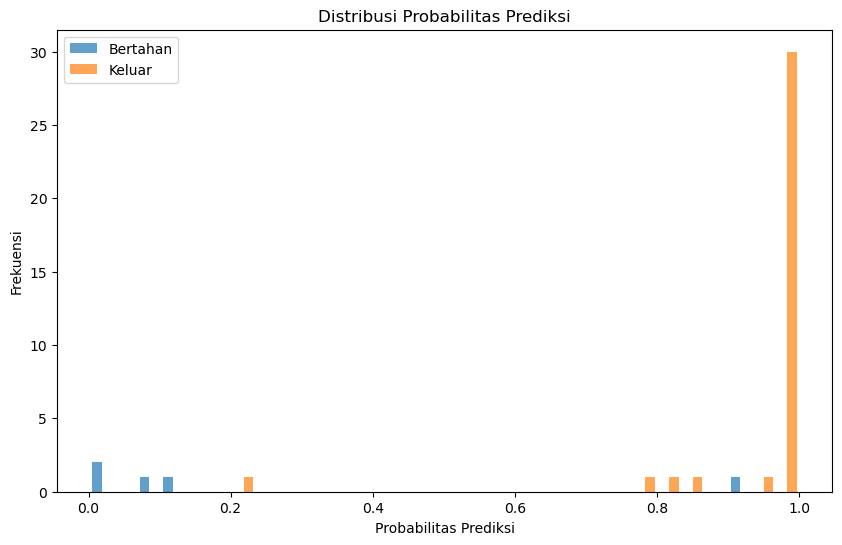

In [15]:
# Prediksi probabilitas untuk semua data testing
y_pred_proba = model.predict(X_test_scaled).flatten()
y_pred_binary = (y_pred_proba > 0.5).astype(int)

# Gabungkan data prediksi dengan data asli untuk analisis mendalam
comparison_df = pd.DataFrame({
    'Actual_Intention': y_test.values,
    'Predicted_Intention': y_pred_binary,
    'Prediction_Probability': y_pred_proba
})

# Tambahkan kembali beberapa fitur asli untuk konteks
comparison_df = pd.concat([
    comparison_df, 
    X_test.reset_index(drop=True)
], axis=1)

# Urutkan berdasarkan prediksi yang salah untuk fokus pada kasus tersulit
comparison_df['Prediction_Correct'] = comparison_df['Actual_Intention'] == comparison_df['Predicted_Intention']
comparison_df_sorted = comparison_df.sort_values('Prediction_Correct')

# Tampilkan 10 contoh prediksi termasuk yang salah
print("\n10 Contoh Prediksi Terperinci:")
display_columns = [
    'Actual_Intention', 'Predicted_Intention', 'Prediction_Probability', 
    'Prediction_Correct', 'Sex', 'Marital Status', 'Children', 
    'Education', 'Years Employed', 'Work Hours', 'Salary'
]
print(comparison_df_sorted[display_columns].head(10).to_string())

# Visualisasi distribusi probabilitas prediksi
plt.figure(figsize=(10,6))
plt.hist([
    y_pred_proba[y_test == 0],  # Probabilitas untuk yang aktual bertahan
    y_pred_proba[y_test == 1]   # Probabilitas untuk yang aktual keluar
], label=['Bertahan', 'Keluar'], bins=30, alpha=0.7)
plt.title('Distribusi Probabilitas Prediksi')
plt.xlabel('Probabilitas Prediksi')
plt.ylabel('Frekuensi')
plt.legend()
plt.show()

In [17]:
# Analisis kesalahan prediksi
misclassified = comparison_df[comparison_df['Actual_Intention'] != comparison_df['Predicted_Intention']]
print("\nRingkasan Kesalahan Prediksi:")
print("Total kesalahan prediksi:", len(misclassified))
print("\nKesalahan Prediksi per Kategori:")
misclassified_summary = misclassified.groupby(['Actual_Intention', 'Predicted_Intention']).size()
print(misclassified_summary)

# Simpan hasil prediksi ke CSV
comparison_df.to_csv('../data/employee_retention_predictions.csv', index=False)


Ringkasan Kesalahan Prediksi:
Total kesalahan prediksi: 2

Kesalahan Prediksi per Kategori:
Actual_Intention  Predicted_Intention
0                 1                      1
1                 0                      1
dtype: int64


In [14]:
# Simpan model
model.save('../models/employee_retention_model.h5')
print("\nModel telah disimpan sebagai 'employee_retention_model.h5'")


Model telah disimpan sebagai 'employee_retention_model.h5'
